# Nash Q learning basic implementation

In [33]:
import numpy as np
import nashpy as nash
import ipywidgets as widgets
from IPython.display import display

In [34]:
loadingBar = widgets.IntProgress(
    value=0,
    min=0,
    max=100,
    step=1,
    description='Loading:',
    bar_style='info',
)

In [35]:
Q = 4 #Number of games
N = 2 #Number of players
A = 2 #Number of actions per player

In [36]:
# Player1 action / Player2 action / starting state / ending state / probability
#Player 1 - column player - 0: .3, 1: .4
#Player 2 - row player - 0: .1, 1: .2
TRANSITION_MATRIX = np.array(
    [
        # Player 1 - Action 0
        [
            # Player 2 - Action 0 - .1 .3
            [
                
                [0, 0.5, 0, 0.5],
                [0, 1, 0, 0],
                [0, 0, 1, 0],
                [0.5, 0, 0, 0.5]
                
            ],

            # Player 2 - Action 1 .2 .3
            [
                
                [1, 0, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1],
                [0.5, 0, 0, 0.5]
                
            ]
        ],

        # Player 1 - Action 1
        [
            # Player 2 - Action 0 .1 .4
            [
                
                [1, 0, 0, 0],
                [0, 0, 0, 1],
                [0, 0, 0, 1],
                [0.5, 0, 0, 0.5]
                
            ],

            # Player 2 - Action 1 .2 .4
            [
                
                [0, 0.5, 0, 0.5],
                [0, 0, 1, 0],
                [0, 0, 0, 1],
                [0.5, 0, 0, 0.5]
                
            ]
        ]
    ]
)

In [37]:
TRANSITION_MATRIX[0, 1, 2, 3]

1.0

In [38]:
# state / player1 action / player2 action / [player1 reward, player2 reward]
PAYOFF_MATRIX = np.array([
    # State 0
    [
        [ [2, 1], [0, 0] ],
        [ [0, 0], [1, 2] ]
    ],
    # State 1
    [
        [ [1, 1], [3, 0] ],
        [ [0, 3], [2, 2] ]
    ],
    # State 
    [
        [ [2, 0], [0, 2] ],
        [ [0, 1], [1, 0] ]
    ],
    # State 33
    [
        [ [1, 1], [0, 0] ],
        [ [0, 0], [2, 2] ]
    ],
])

In [39]:
PAYOFF_MATRIX[0, :, :, 0]

array([[2, 0],
       [0, 1]])

In [40]:
def transition_probability(state, player1_action, player2_action, next):
    return TRANSITION_MATRIX[player1_action, player2_action, state, next]

In [41]:
def reward(state, player1_action, player2_action):
    return PAYOFF_MATRIX[state, player1_action, player2_action]

In [42]:
n_games = 1000
state = 0
totalReward = np.array([0, 0])
randomRewards = []

gamesLoadingBarRandom = widgets.IntProgress(
    value=0,
    min=0,
    max=n_games-1,
    step=1,
    description='Games:',
    bar_style='info',
)

display(gamesLoadingBarRandom)

for _ in range(n_games):
    print("State:", state)
    player1_action = np.random.choice(A, p=[0.5, 0.5])
    player2_action = np.random.choice(A, p=[0.5, 0.5])
    print("Player 1 action:", player1_action)
    print("Player 2 action:", player2_action)
    next_state = np.random.choice(range(Q), p=TRANSITION_MATRIX[player1_action, player2_action, state])
    print("Next state:", next_state)
    r = reward(state, player1_action, player2_action)
    print("Reward:", r)
    state = next_state
    totalReward += r
    randomRewards.append(r)
    gamesLoadingBarRandom.value += 1
print("Total reward:", totalReward / n_games)

IntProgress(value=0, bar_style='info', description='Games:', max=999)

State: 0
Player 1 action: 1
Player 2 action: 0
Next state: 0
Reward: [0 0]
State: 0
Player 1 action: 1
Player 2 action: 0
Next state: 0
Reward: [0 0]
State: 0
Player 1 action: 0
Player 2 action: 1
Next state: 0
Reward: [0 0]
State: 0
Player 1 action: 0
Player 2 action: 0
Next state: 3
Reward: [2 1]
State: 3
Player 1 action: 1
Player 2 action: 1
Next state: 0
Reward: [2 2]
State: 0
Player 1 action: 0
Player 2 action: 1
Next state: 0
Reward: [0 0]
State: 0
Player 1 action: 1
Player 2 action: 0
Next state: 0
Reward: [0 0]
State: 0
Player 1 action: 1
Player 2 action: 0
Next state: 0
Reward: [0 0]
State: 0
Player 1 action: 1
Player 2 action: 1
Next state: 1
Reward: [1 2]
State: 1
Player 1 action: 0
Player 2 action: 0
Next state: 1
Reward: [1 1]
State: 1
Player 1 action: 1
Player 2 action: 0
Next state: 3
Reward: [0 3]
State: 3
Player 1 action: 0
Player 2 action: 1
Next state: 3
Reward: [0 0]
State: 3
Player 1 action: 0
Player 2 action: 0
Next state: 0
Reward: [1 1]
State: 0
Player 1 action:

In [43]:
def computeNashEq(state, payoff_matrix):
    game = nash.Game(payoff_matrix[state, :, :, 0], PAYOFF_MATRIX[state, :, :, 1])
    eqs = game.vertex_enumeration()

    try:
        eq = next(eqs)
        return np.abs(eq)
    except Exception:
        a = 1
        b = 0
        return [[a, 1 - a], [b, 1 - b]]
    

In [44]:
computeNashEq(3, PAYOFF_MATRIX)

array([[1., 0.],
       [1., 0.]])

In [45]:
#Simulate plays with nash policy
state = 0
totalReward = np.array([0, 0])
localNashRewards = []
EPSILON = 0.1

gamesLoadingBarLocalNash = widgets.IntProgress(
    value=0,
    min=0,
    max=n_games-1,
    step=1,
    description='Games:',
    bar_style='info',
)

display(gamesLoadingBarLocalNash)

for _ in range(n_games):
    print("State:", state)
    nashEq = computeNashEq(state, PAYOFF_MATRIX)
    print("Nash equilibrium:", nashEq)
    player1_action = np.random.choice(A, p=nashEq[0]) if np.random.rand() > EPSILON else np.random.choice(A)
    player2_action = np.random.choice(A, p=nashEq[1]) if np.random.rand() > EPSILON else np.random.choice(A)
    print("Player 1 action:", player1_action)
    print("Player 2 action:", player2_action)
    next_state = np.random.choice(range(Q), p=TRANSITION_MATRIX[player1_action, player2_action, state])
    print("Next state:", next_state)
    r = reward(state, player1_action, player2_action)
    print("Reward:", r)
    state = next_state
    totalReward += r
    localNashRewards.append(r)
    gamesLoadingBarLocalNash.value += 1
print("Total reward:", totalReward/n_games)

IntProgress(value=0, bar_style='info', description='Games:', max=999)

State: 0
Nash equilibrium: [[1.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.22044605e-16]]
Player 1 action: 0
Player 2 action: 0
Next state: 1
Reward: [2 1]
State: 1
Nash equilibrium: [[1. 0.]
 [1. 0.]]
Player 1 action: 0
Player 2 action: 0
Next state: 1
Reward: [1 1]
State: 1
Nash equilibrium: [[1. 0.]
 [1. 0.]]
Player 1 action: 0
Player 2 action: 0
Next state: 1
Reward: [1 1]
State: 1
Nash equilibrium: [[1. 0.]
 [1. 0.]]
Player 1 action: 0
Player 2 action: 0
Next state: 1
Reward: [1 1]
State: 1
Nash equilibrium: [[1. 0.]
 [1. 0.]]
Player 1 action: 0
Player 2 action: 0
Next state: 1
Reward: [1 1]
State: 1
Nash equilibrium: [[1. 0.]
 [1. 0.]]
Player 1 action: 0
Player 2 action: 0
Next state: 1
Reward: [1 1]
State: 1
Nash equilibrium: [[1. 0.]
 [1. 0.]]
Player 1 action: 0
Player 2 action: 0
Next state: 1
Reward: [1 1]
State: 1
Nash equilibrium: [[1. 0.]
 [1. 0.]]
Player 1 action: 0
Player 2 action: 0
Next state: 1
Reward: [1 1]
State: 1
Nash equilibrium: [[1. 0.]
 [1. 0.]]
Player 1 a

In [46]:
qTables = [ np.zeros((Q, A, A, N)) for _ in range(N)]

In [47]:
for i in range(N):
    computeNashEq(0, qTables[i])

In [48]:
def expectedPayoff(payoff_matrix, player1_strategy, player2_strategy):
    expected_payoff = np.dot(np.dot(player1_strategy, payoff_matrix), player2_strategy)
    return expected_payoff
    

In [49]:
print(PAYOFF_MATRIX[0, :, :])

[[[2 1]
  [0 0]]

 [[0 0]
  [1 2]]]


In [50]:
expectedPayoff(PAYOFF_MATRIX[2, :, :, 1], np.array([0.5, .5]), np.array([1, 0]))

0.5

In [51]:
#NashQ
ALPHA = 0.5
GAMMA = 0.8
EPSILON = 0.1
PURE_TRAINING_EPISODES = 1000
# n_games = 5000

nashEq = [np.array([0.5, 0.5]), np.array([0.5, 0.5])]


qTables = [np.zeros((Q, A, A, N)) for _ in range(N)] #QTable for each player

state = 0
totalReward = [np.array([0, 0]) for _ in range(N)]
diffs = [[]for _ in range(N)]
NashQRewards = [[]for _ in range(N)]
NashEquilibria = [[]for _ in range(N)]

gamesLoadingBarNashQ = widgets.IntProgress(
      value=0,
      min=0,
      max=n_games-1,
      step=1,
      description='Games:',
      bar_style='info',
)

display(gamesLoadingBarNashQ)

playerLoadingBar = widgets.IntProgress(
      value=0,
      min=0,
      max=N-1,
      step=1,
      description='Players:',
      bar_style='info',
)

display(playerLoadingBar)


for t in range(n_games):
   ALPHA = 1 / (t + 1 - PURE_TRAINING_EPISODES) if t >= PURE_TRAINING_EPISODES else ALPHA
   player1_action = np.random.choice(A, p=nashEq[0]) if np.random.rand() > EPSILON else np.random.choice(A)
   player2_action = np.random.choice(A, p=nashEq[1]) if np.random.rand() > EPSILON else np.random.choice(A)
   #print("Player 1 action:", player1_action)
   #print("Player 2 action:", player2_action)
   next_state = np.random.choice(range(Q), p=TRANSITION_MATRIX[player1_action, player2_action, state])
   #print("Next state:", next_state)
   r = reward(state, player1_action, player2_action)
   #print("Reward:", r)
   for i in range(N):
      playerLoadingBar.value = i
      qTable = qTables[i]

      #print("State:", state)
      nashEq = np.abs(computeNashEq(state, qTable))
      # print("Nash equilibrium:", nashEq)
      NashEquilibria[i].append(nashEq)

      next_NashEq = computeNashEq(next_state, qTable)
      next_qVal_0 = expectedPayoff(qTable[next_state, :, :, 0], next_NashEq[0], next_NashEq[1])
      next_qVal_1 = expectedPayoff(qTable[next_state, :, :, 1], next_NashEq[0], next_NashEq[1])
      oldQ = qTable[state, player1_action, player2_action].copy()
      qTable[state, player1_action, player2_action, 0] = (1 - ALPHA) * qTable[state, player1_action, player2_action, 0] + ALPHA * (r[0] + GAMMA * next_qVal_0)
      qTable[state, player1_action, player2_action, 1] = (1 - ALPHA) * qTable[state, player1_action, player2_action, 1] + ALPHA * (r[1] + GAMMA * next_qVal_1)

      diffs[i].append(qTable[state, player1_action, player2_action] - oldQ)
      # print("QTable:", qTable[state])
      
      totalReward[i] += r
      NashQRewards[i].append(r)
   state = next_state
   gamesLoadingBarNashQ.value += 1
for i in range(N):
   print("Expected reward:", totalReward[i]/n_games)
for i in range(N):
   print("QTable:", qTables[i])

IntProgress(value=0, bar_style='info', description='Games:', max=999)

IntProgress(value=0, bar_style='info', description='Players:', max=1)

/Users/andre/Library/Python/3.9/lib/python/site-packages/nashpy/polytope/polytope.py:109: RuntimeWarning: divide by zero encountered in divide
  hs = HalfspaceIntersection(halfspaces, feasible_point)
/Users/andre/Library/Python/3.9/lib/python/site-packages/nashpy/polytope/polytope.py:109: RuntimeWarning: invalid value encountered in divide
  hs = HalfspaceIntersection(halfspaces, feasible_point)


Expected reward: [1.11  1.218]
Expected reward: [1.11  1.218]
QTable: [[[[6.08256792 5.11235162]
   [4.51463872 5.07374639]]

  [[5.06500616 4.38879696]
   [4.45712882 8.00975235]]]


 [[[5.00000653 5.00037074]
   [6.83191999 4.81657252]]

  [[4.86894084 7.25997096]
   [6.09019586 8.89172158]]]


 [[[5.83212648 4.81612717]
   [4.76016388 6.20825347]]

  [[4.69338135 7.76500323]
   [3.85830687 3.97836664]]]


 [[[5.93269197 5.22927706]
   [4.85173486 4.43836525]]

  [[5.01036611 4.39476049]
   [5.77528641 6.34408025]]]]
QTable: [[[[6.08256792 5.11235162]
   [4.51463872 5.07374639]]

  [[5.06500616 4.38879696]
   [4.45712882 8.00975235]]]


 [[[5.00000653 5.00037074]
   [6.83191999 4.81657252]]

  [[4.86894084 7.25997096]
   [6.09019586 8.89172158]]]


 [[[5.83212648 4.81612717]
   [4.76016388 6.20825347]]

  [[4.69338135 7.76500323]
   [3.85830687 3.97836664]]]


 [[[5.93269197 5.22927706]
   [4.85173486 4.43836525]]

  [[5.01036611 4.39476049]
   [5.77528641 6.34408025]]]]


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
for i in range(N):
    diffs[i] = np.array(diffs[i])
    print(diffs[i].shape)
    diffs[i]
    NashQRewards[i] = np.array(NashQRewards[i])

randomRewards = np.array(randomRewards)
localNashRewards = np.array(localNashRewards)
NashQRewards = np.array(NashQRewards)
diffs = np.array(diffs)

(1000, 2)
(1000, 2)


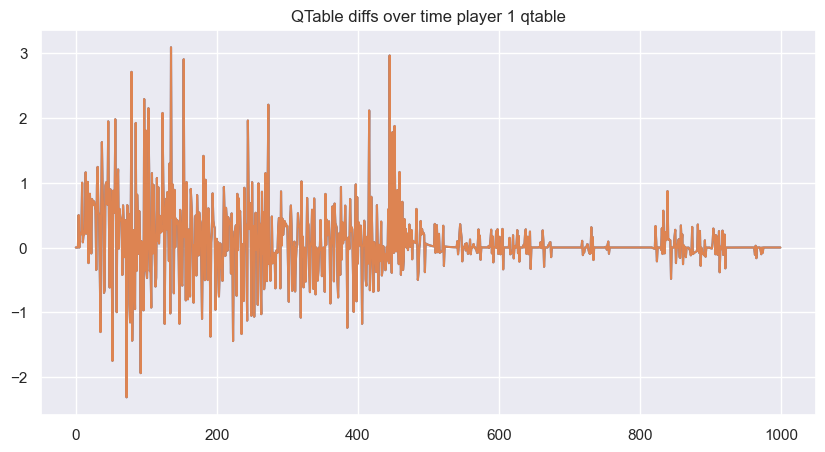

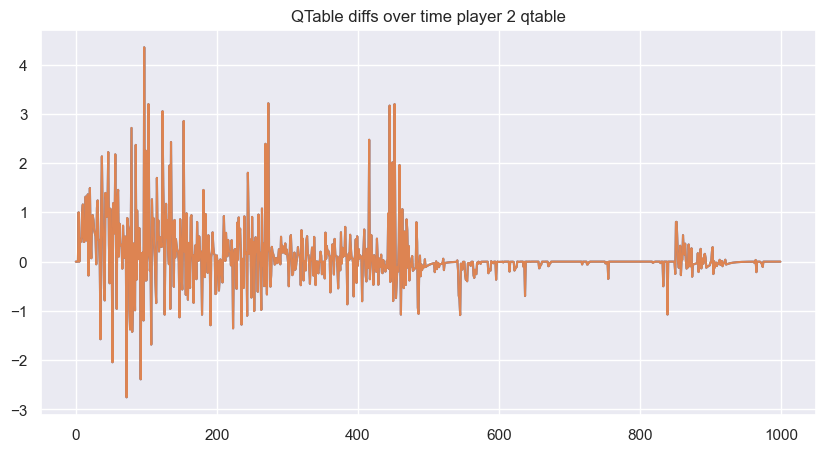

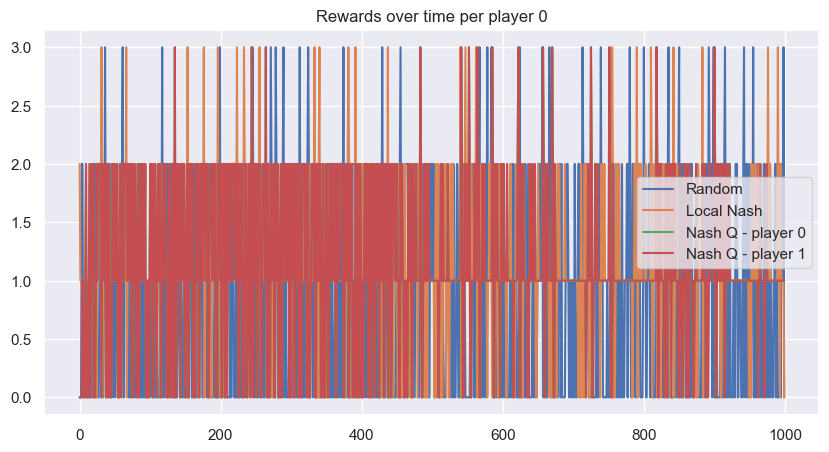

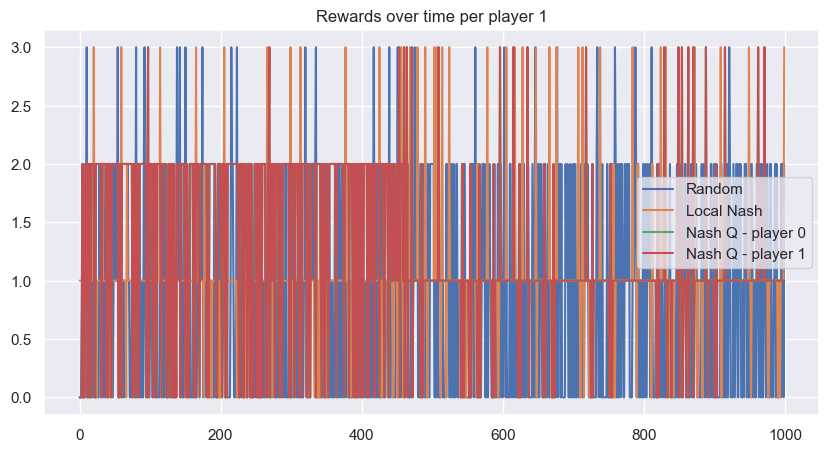

In [ ]:
sns.set_theme()

plt.figure(figsize=(10, 5))
plt.title("QTable diffs over time player 1 qtable")
for i in range(N):
    sns.lineplot(data=diffs[i, :, 0])
plt.show()

plt.figure(figsize=(10, 5))
plt.title("QTable diffs over time player 2 qtable")
for i in range(N):
    sns.lineplot(data=diffs[i, :, 1])
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Rewards over time per player 0")
sns.lineplot(data=randomRewards[:, 0], label="Random")
sns.lineplot(data=localNashRewards[:, 0], label="Local Nash")
for i in range(N):
    sns.lineplot(data=NashQRewards[i, :, 0], label="Nash Q - player "+str(i))

plt.figure(figsize=(10, 5))
plt.title("Rewards over time per player 1")
sns.lineplot(data=randomRewards[:, 1], label="Random")
sns.lineplot(data=localNashRewards[:, 1], label="Local Nash")
for i in range(N):
    sns.lineplot(data=NashQRewards[i, :, 1], label="Nash Q - player "+str(i))

plt.show()

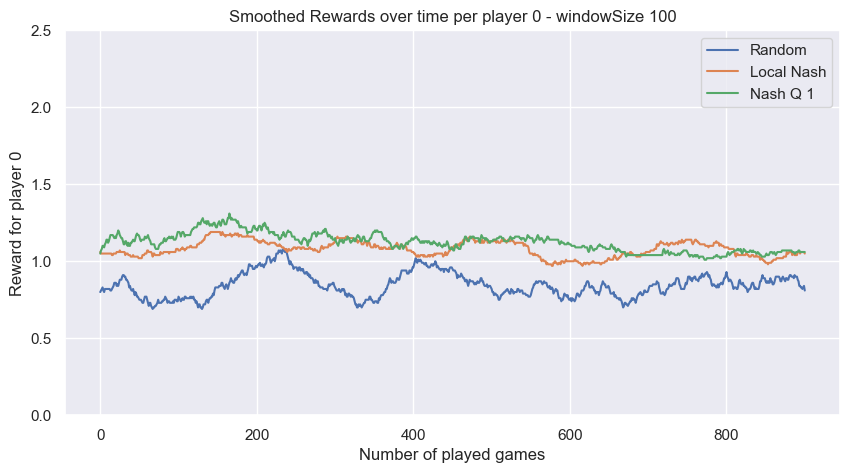

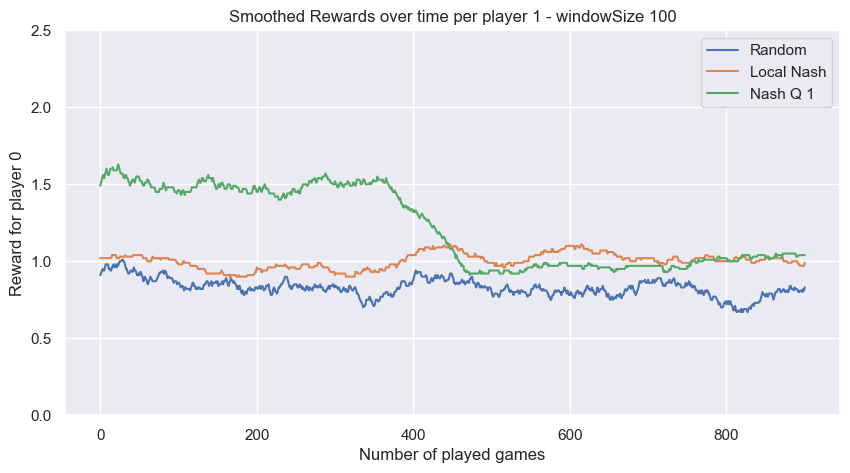

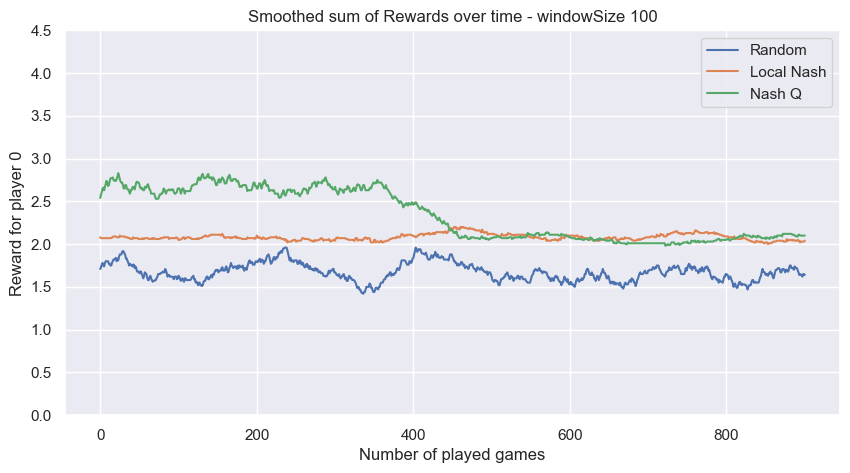

In [55]:
# smooth the data
window = 100
cumsum = np.cumsum(randomRewards[:, 0])
cumsum[window:] = cumsum[window:] - cumsum[:-window]
randomRewardsSmooth_0 = cumsum[window - 1:] / window

cumsum = np.cumsum(localNashRewards[:, 0])
cumsum[window:] = cumsum[window:] - cumsum[:-window]
localNashRewardsSmooth_0 = cumsum[window - 1:] / window

cumsum = np.cumsum(NashQRewards[0][:, 0])
cumsum[window:] = cumsum[window:] - cumsum[:-window]
NashQRewardsSmooth_0 = cumsum[window - 1:] / window

plt.figure(figsize=(10, 5))
plt.title(f"Smoothed Rewards over time per player 0 - windowSize {window}")
sns.lineplot(data=randomRewardsSmooth_0, label="Random")
sns.lineplot(data=localNashRewardsSmooth_0, label="Local Nash")
sns.lineplot(data=NashQRewardsSmooth_0, label="Nash Q "+str(i))
plt.ylim(0, 2.5)
plt.xlabel("Number of played games")
plt.ylabel("Reward for player 0")
plt.show()

cumsum = np.cumsum(randomRewards[:, 1])
cumsum[window:] = cumsum[window:] - cumsum[:-window]
randomRewardsSmooth_1 = cumsum[window - 1:] / window

cumsum = np.cumsum(localNashRewards[:, 1])
cumsum[window:] = cumsum[window:] - cumsum[:-window]
localNashRewardsSmooth_1 = cumsum[window - 1:] / window

cumsum = np.cumsum(NashQRewards[0][:, 1])
cumsum[window:] = cumsum[window:] - cumsum[:-window]
NashQRewardsSmooth_1 = cumsum[window - 1:] / window


plt.figure(figsize=(10, 5))
plt.title(f"Smoothed Rewards over time per player 1 - windowSize {window}")
sns.lineplot(data=randomRewardsSmooth_1, label="Random")
sns.lineplot(data=localNashRewardsSmooth_1, label="Local Nash")
sns.lineplot(data=NashQRewardsSmooth_1, label="Nash Q "+str(i))
plt.ylim(0, 2.5)
plt.xlabel("Number of played games")
plt.ylabel("Reward for player 0")
plt.show()

randomRewardsSmooth_sum = randomRewardsSmooth_0 + randomRewardsSmooth_1
localNashRewardsSmooth_sum = localNashRewardsSmooth_0 + localNashRewardsSmooth_1
NashQRewardsSmooth_sum = NashQRewardsSmooth_0 + NashQRewardsSmooth_1

plt.figure(figsize=(10, 5))
plt.title(f"Smoothed sum of Rewards over time - windowSize {window}")
sns.lineplot(data=randomRewardsSmooth_sum, label="Random")
sns.lineplot(data=localNashRewardsSmooth_sum, label="Local Nash")
sns.lineplot(data=NashQRewardsSmooth_sum, label="Nash Q")
plt.ylim(0, 4.5)
plt.xlabel("Number of played games")
plt.ylabel("Reward for player 0")
plt.show()



TEST CASES

In [61]:
def nashQlearning(n_players, q, alpha, gamma, epsilon, pure_training_ep, actions_per_player, transition_matrix, n_games):
    #NashQ
    ALPHA = alpha
    GAMMA = gamma
    EPSILON = epsilon
    PURE_TRAINING_EPISODES = pure_training_ep
    TRANSITION_MATRIX = transition_matrix
    A = actions_per_player
    N = n_players
    Q = q
    
    qTables = [np.zeros((Q, A, A, N)) for _ in range(N)] #QTable for each player

    state = 0
    totalReward = [np.array([0, 0]) for _ in range(N)]
    diffs = [[]for _ in range(N)]
    NashQRewards = [[]for _ in range(N)]
    NashEquilibria = [[]for _ in range(N)]
    nashEq = [np.array([0.5, 0.5]), np.array([0.5, 0.5])]

    gamesLoadingBarNashQ = widgets.IntProgress(
        value=0,
        min=0,
        max=n_games-1,
        step=1,
        description='Games:',
        bar_style='info',
    )

    display(gamesLoadingBarNashQ)

    playerLoadingBar = widgets.IntProgress(
        value=0,
        min=0,
        max=N-1,
        step=1,
        description='Players:',
        bar_style='info',
    )

    display(playerLoadingBar)

    for t in range(n_games):
        ALPHA = 1 / (t + 1 - PURE_TRAINING_EPISODES) if t >= PURE_TRAINING_EPISODES else ALPHA
        player1_action = np.random.choice(A, p=nashEq[0]) if np.random.rand() > EPSILON else np.random.choice(A)
        player2_action = np.random.choice(A, p=nashEq[1]) if np.random.rand() > EPSILON else np.random.choice(A)

        next_state = np.random.choice(range(Q), p=TRANSITION_MATRIX[player1_action, player2_action, state])

        r = reward(state, player1_action, player2_action)
        for i in range(N):
            playerLoadingBar.value = i
            qTable = qTables[i]

            nashEq = np.abs(computeNashEq(state, qTable))

            NashEquilibria[i].append(nashEq)

            next_NashEq = computeNashEq(next_state, qTable)
            next_qVal_0 = expectedPayoff(qTable[next_state, :, :, 0], next_NashEq[0], next_NashEq[1])
            next_qVal_1 = expectedPayoff(qTable[next_state, :, :, 1], next_NashEq[0], next_NashEq[1])
            oldQ = qTable[state, player1_action, player2_action].copy()
            qTable[state, player1_action, player2_action, 0] = (1 - ALPHA) * qTable[state, player1_action, player2_action, 0] + ALPHA * (r[0] + GAMMA * next_qVal_0)
            qTable[state, player1_action, player2_action, 1] = (1 - ALPHA) * qTable[state, player1_action, player2_action, 1] + ALPHA * (r[1] + GAMMA * next_qVal_1)

            diffs[i].append(qTable[state, player1_action, player2_action] - oldQ)
            
            totalReward[i] += r
            NashQRewards[i].append(r)
        state = next_state
        gamesLoadingBarNashQ.value += 1
    return totalReward, diffs, NashQRewards, NashEquilibria


In [63]:
totalReward, diffs, NashQRewards, NashEquilibria = nashQlearning(N, Q, 0.5, 0.8, 0.1, 1000, A, TRANSITION_MATRIX, n_games)

IntProgress(value=0, bar_style='info', description='Games:', max=999)

IntProgress(value=0, bar_style='info', description='Players:', max=1)